In [6]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

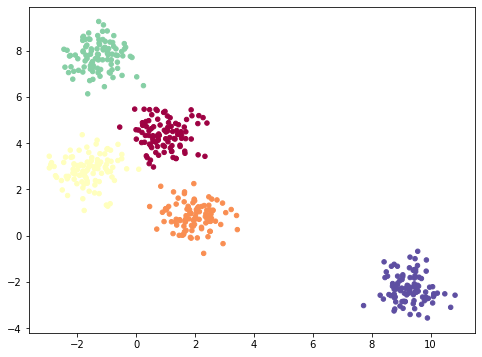

In [2]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)

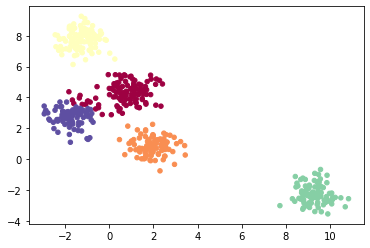

In [3]:
from sklearn.cluster import AgglomerativeClustering
clf = AgglomerativeClustering(n_clusters=5, linkage= 'complete')  # single linkage was not available in sklearn 
# available linkage : {“ward”, “complete”, “average”, “single” ! WRONG ! }, optional (default=”ward”)
predicted = clf.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c= colors[predicted], s= 20)

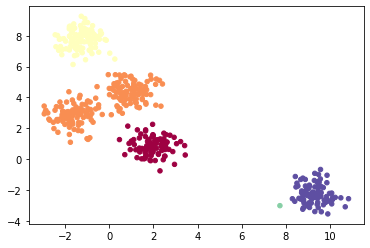

In [4]:
clf = AgglomerativeClustering(n_clusters=5, linkage= 'single')  # single linkage was not available in sklearn 
# available linkage : {“ward”, “complete”, “average”, “single” ! WRONG ! }, optional (default=”ward”)
predicted = clf.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c= colors[predicted], s= 20)

In [7]:
def apply_db_scan(points, eps):
    dbscan = DBSCAN(eps=eps, min_samples=2, ).fit(points) # default eps=0.5, min_samples=5
    # dbscan = DBSCAN(min_samples=6).fit(points)
    predicted = dbscan.labels_
    n_clusters_and_noice = len(np.unique(predicted))-1
    print ('n_clusters_and_noice ={}\n'.format(n_clusters_and_noice))

    predicted[np.where(predicted == -1)] = n_clusters_and_noice
    return predicted 

predicted = apply_db_scan(X, eps=0.8) #  1.6 (5) # 1.7(3) # 1.65 (4but...) # 1.5 (8 looks good)
print (predicted)

n_clusters_and_noice =3

[0 1 1 1 1 2 1 2 0 0 3 1 1 3 1 2 1 2 1 1 0 2 1 1 0 3 0 0 3 1 0 1 1 3 1 0 0
 2 2 2 3 2 1 1 1 1 2 1 0 3 1 2 0 0 2 1 2 2 3 1 0 2 0 1 1 3 1 3 1 1 1 0 1 2
 1 1 0 0 1 0 1 3 1 1 2 0 2 1 1 1 1 3 3 1 2 0 0 1 3 1 0 3 3 0 3 1 2 0 0 1 1
 1 0 2 2 3 3 3 0 2 2 1 1 3 1 1 2 1 3 3 3 0 1 2 3 2 2 2 1 1 0 3 0 1 0 2 2 3
 0 1 1 3 3 0 1 1 1 1 3 1 3 2 1 1 0 0 1 0 2 0 1 1 2 2 0 3 1 3 1 3 1 3 3 2 1
 2 0 1 3 2 3 0 2 1 0 1 1 2 3 3 0 3 1 3 3 0 2 1 1 1 2 3 1 3 2 3 2 0 0 1 0 1
 2 2 2 1 1 2 2 1 0 1 1 3 3 1 3 1 2 1 0 1 3 2 0 0 3 3 0 2 2 1 0 0 1 1 1 1 1
 3 2 1 3 0 1 1 2 0 1 1 1 3 1 0 3 0 3 0 3 3 1 0 0 0 1 0 3 1 3 2 1 1 1 1 0 2
 3 1 2 3 2 1 0 0 3 1 2 0 0 3 2 3 1 2 1 1 1 2 2 2 3 3 1 0 1 3 2 2 0 0 3 1 0
 1 1 1 1 3 0 2 1 1 1 2 0 0 0 3 1 1 1 0 1 1 0 0 1 1 1 2 1 1 2 1 1 0 1 0 3 3
 0 1 2 1 0 0 2 1 3 1 2 2 1 2 2 3 3 2 1 3 3 3 1 2 2 2 2 0 3 0 1 1 2 0 0 1 1
 1 1 3 2 1 2 3 1 1 2 3 1 0 2 1 3 1 0 1 1 3 0 1 1 2 3 0 3 0 1 3 0 3 0 2 1 1
 3 0 0 1 1 1 1 1 2 1 1 0 2 1 3 1 2 3 1 2 1 1 3 1 1 1 2 1 3 0 1 1 3 2 1 2 1


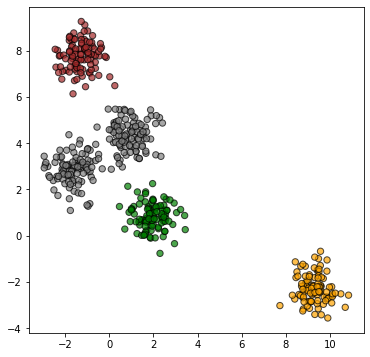

In [8]:
plt.figure(figsize=(6,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow'])
colors= np.r_[colors, np.array(['black']*100)]

plt.scatter(X[:,0], X[:,1], c= colors[predicted], s=40, edgecolor = 'black', label='negative', alpha = 0.7)    

In [9]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

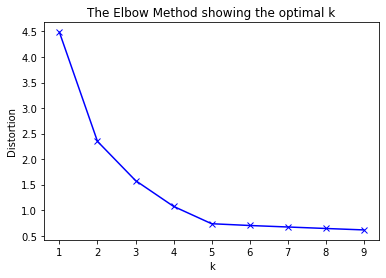

In [10]:
def plot_distortions(X):
    # k means determine k
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        # cdist(X, kmeanModel.cluster_centers_, 'euclidean') - matrix of distances between each x and eac h cluster,  shape = (len(X), k)
        # then get min distance for each samnple (axis=1)    
        # sum up all distances
        # get averarage for all samples     
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])


    # Plot the elbow
    plt.figure()
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

plot_distortions(X)

In [11]:
clf = KMeans(n_clusters=5) # n_init : int, default: 10  - Number of time the k-means algorithm will be run with different centroid seeds.
clf.fit(X)
predicted= clf.predict(X)
predicted

array([4, 0, 0, 3, 0, 1, 0, 1, 4, 4, 2, 3, 0, 2, 3, 1, 3, 1, 0, 3, 4, 1,
       3, 3, 4, 2, 4, 4, 2, 3, 4, 0, 0, 2, 0, 4, 4, 1, 1, 1, 2, 1, 3, 3,
       0, 0, 1, 0, 4, 2, 0, 1, 4, 4, 1, 0, 1, 1, 2, 3, 4, 1, 4, 3, 0, 2,
       3, 2, 0, 0, 3, 4, 3, 1, 0, 3, 4, 4, 3, 4, 3, 2, 0, 0, 1, 4, 1, 0,
       0, 3, 3, 2, 2, 3, 1, 4, 4, 3, 2, 0, 4, 2, 2, 4, 2, 3, 1, 4, 4, 0,
       0, 3, 4, 1, 1, 2, 2, 2, 4, 1, 1, 3, 0, 2, 3, 0, 1, 3, 2, 2, 2, 4,
       0, 1, 2, 1, 1, 1, 0, 3, 4, 2, 4, 3, 4, 1, 1, 2, 4, 0, 0, 2, 2, 4,
       3, 0, 0, 0, 2, 3, 2, 1, 3, 0, 4, 4, 3, 4, 1, 4, 3, 0, 1, 1, 4, 2,
       3, 2, 0, 2, 0, 2, 2, 1, 3, 1, 4, 0, 2, 1, 2, 4, 1, 3, 4, 3, 3, 1,
       2, 2, 4, 2, 0, 2, 2, 4, 1, 3, 3, 0, 1, 2, 0, 2, 1, 2, 1, 4, 4, 0,
       4, 3, 1, 1, 1, 0, 3, 1, 1, 3, 4, 3, 0, 2, 2, 3, 2, 3, 1, 0, 4, 0,
       2, 1, 4, 4, 2, 2, 4, 1, 1, 0, 4, 4, 0, 0, 3, 0, 3, 2, 1, 3, 2, 4,
       0, 3, 1, 4, 3, 0, 0, 2, 3, 4, 2, 4, 2, 4, 2, 2, 3, 4, 4, 4, 0, 4,
       2, 3, 2, 1, 3, 0, 0, 0, 4, 1, 2, 3, 1, 2, 1,

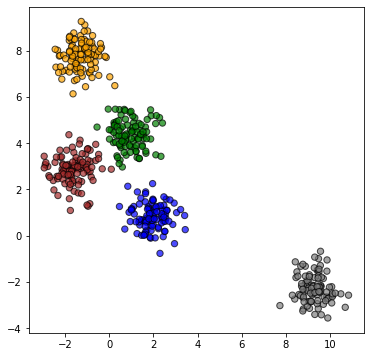

In [12]:
plt.figure(figsize=(6,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow'])
colors= np.r_[colors, np.array(['black']*100)]

plt.scatter(X[:,0], X[:,1], c= colors[predicted], s=40, edgecolor = 'black', label='negative', alpha = 0.7)    